✅ Libraries loaded successfully!
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood s

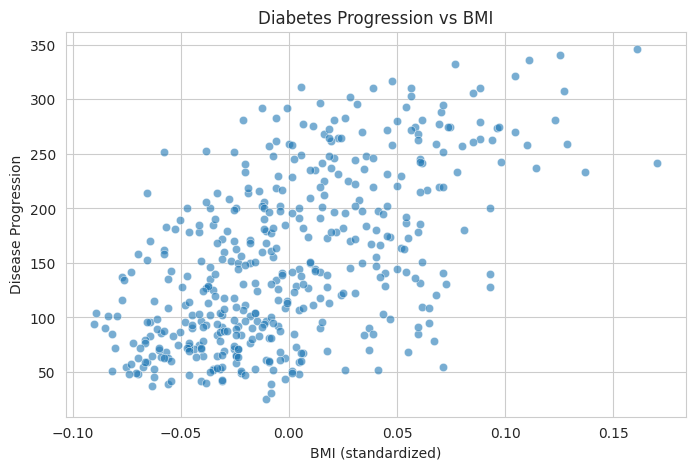

Intercept (b₀): 152.00335421448167
Coefficient (b₁ for BMI): 998.5776891375598
MAE: 52.259976445345536
MSE: 4061.8259284949268
RMSE: 63.73245584860925
R² Score: 0.23335039815872138


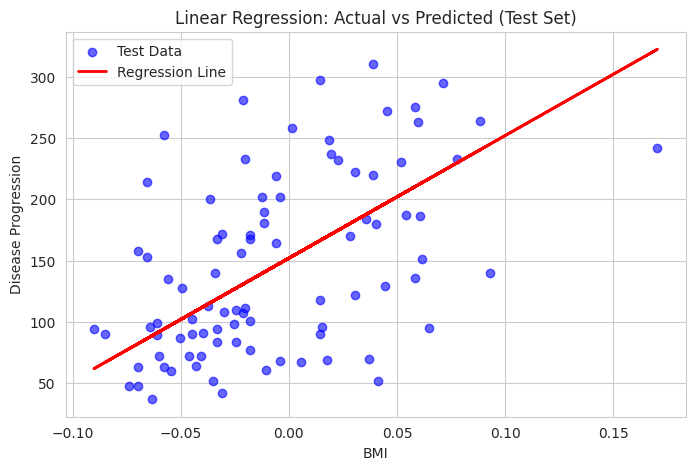

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

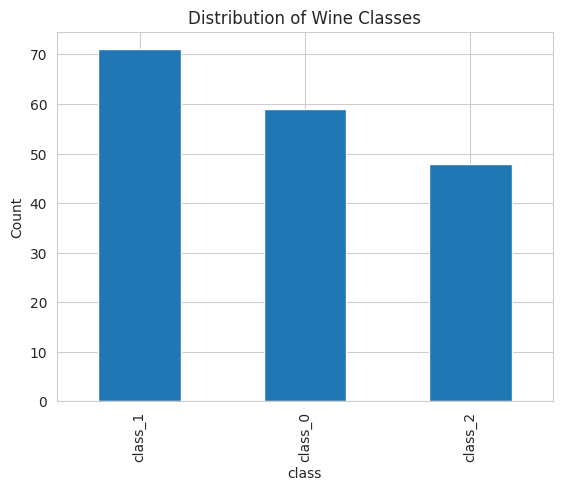

Test Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



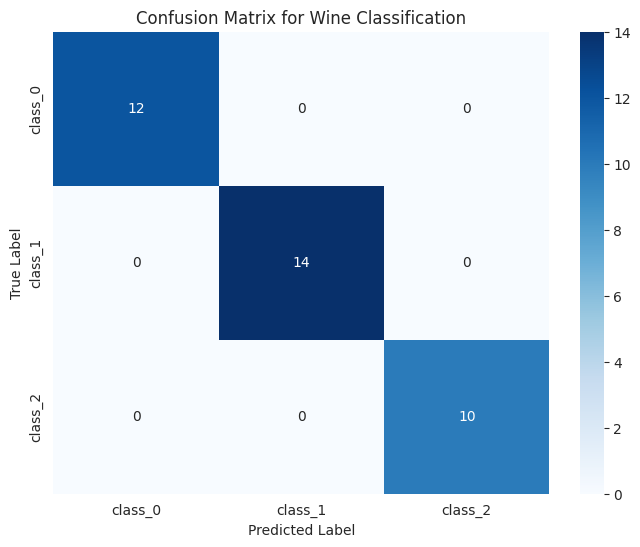

Features for sample: [1.41e+01 2.16e+00 2.30e+00 1.80e+01 1.05e+02 2.95e+00 3.32e+00 2.20e-01
 2.38e+00 5.75e+00 1.25e+00 3.17e+00 1.51e+03]
Actual class: class_0
Predicted class: class_0
Predicted probabilities:
  class_0: 0.9978
  class_1: 0.0020
  class_2: 0.0002


In [4]:
# === Setup and Imports ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

%matplotlib inline
sns.set_style("whitegrid")

print("✅ Libraries loaded successfully!")

diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes["target"] = diabetes.target

print("Dataset shape:", df_diabetes.shape)
df_diabetes.head()

df_diabetes.describe()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_diabetes, x="bmi", y="target", alpha=0.6)
plt.title("Diabetes Progression vs BMI")
plt.xlabel("BMI (standardized)")
plt.ylabel("Disease Progression")
plt.show()

# Use BMI as the single feature
X = df_diabetes[["bmi"]]
y = df_diabetes["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

print("Intercept (b₀):", lin_model.intercept_)
print("Coefficient (b₁ for BMI):", lin_model.coef_[0])

y_pred = lin_model.predict(X_test)

# Compare actual vs predicted
pd.DataFrame({"Actual": y_test, "Predicted": y_pred}).head(10)

print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R² Score:", metrics.r2_score(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color="blue", alpha=0.6, label="Test Data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
plt.title("Linear Regression: Actual vs Predicted (Test Set)")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.legend()
plt.show()

wine = datasets.load_wine()
print(wine.DESCR)

df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine["target"] = wine.target
df_wine["class"] = df_wine["target"].map({0: wine.target_names[0],
                                          1: wine.target_names[1],
                                          2: wine.target_names[2]})

print("Dataset shape:", df_wine.shape)
df_wine.head()

df_wine["class"].value_counts().plot(kind="bar")
plt.title("Distribution of Wine Classes")
plt.ylabel("Count")
plt.show()

X = df_wine[wine.feature_names]
y = df_wine["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(random_state=42, multi_class="ovr", max_iter=1000)
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report:\n",
      metrics.classification_report(y_test, y_pred, target_names=wine.target_names))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title("Confusion Matrix for Wine Classification")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

sample_index = 0
print("Features for sample:", X_test.iloc[sample_index].values)
print("Actual class:", wine.target_names[y_test.iloc[sample_index]])
print("Predicted class:", wine.target_names[y_pred[sample_index]])
print("Predicted probabilities:")
for i, cls in enumerate(wine.target_names):
    print(f"  {cls}: {y_pred_proba[sample_index][i]:.4f}")
